Mean squared error: 86091.65


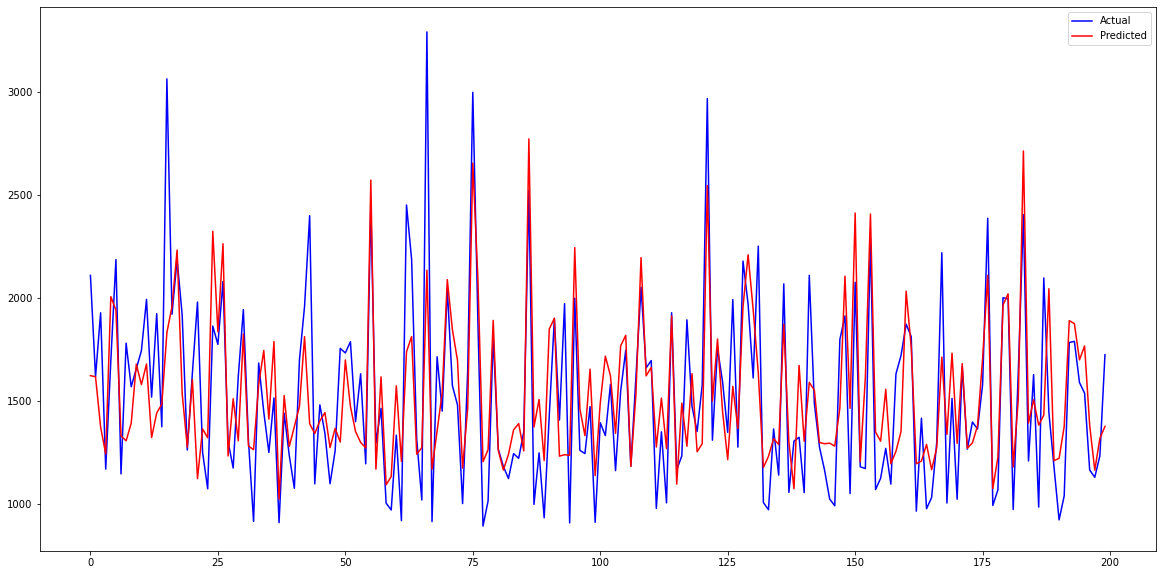

In [7]:
import pandas as pd
import glob
import numpy as np
from sklearn.model_selection import train_test_split

# Load the data from csv files
data = pd.concat([pd.read_csv(f) for f in glob.glob('../data/s*.csv')])

# Drop the index column
data = data.drop(['Unnamed: 0'], axis=1)

data["flowrate_cat"] = pd.cut(data["flowrate"], 
                              bins=[885.89, 1050.58, 1179.70, 1296.52, 1409.73, 1528.36, 1667.3, 1839.9, 2104.5, np.inf], 
                              right=False)
# Drop null values
data = data.dropna()

# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(data.drop(['flowrate', "flowrate_cat"], axis=1), data['flowrate'], test_size=0.3, random_state=42, stratify=data['flowrate_cat'])

# Train linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Predict the flowrate for the test set
y_pred = model.predict(X_test)

# Get the mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % mse)

import matplotlib.pyplot as plt

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred[:200], color='red', label='Predicted')
plt.legend()
plt.show()

Mean squared error: 133774.84


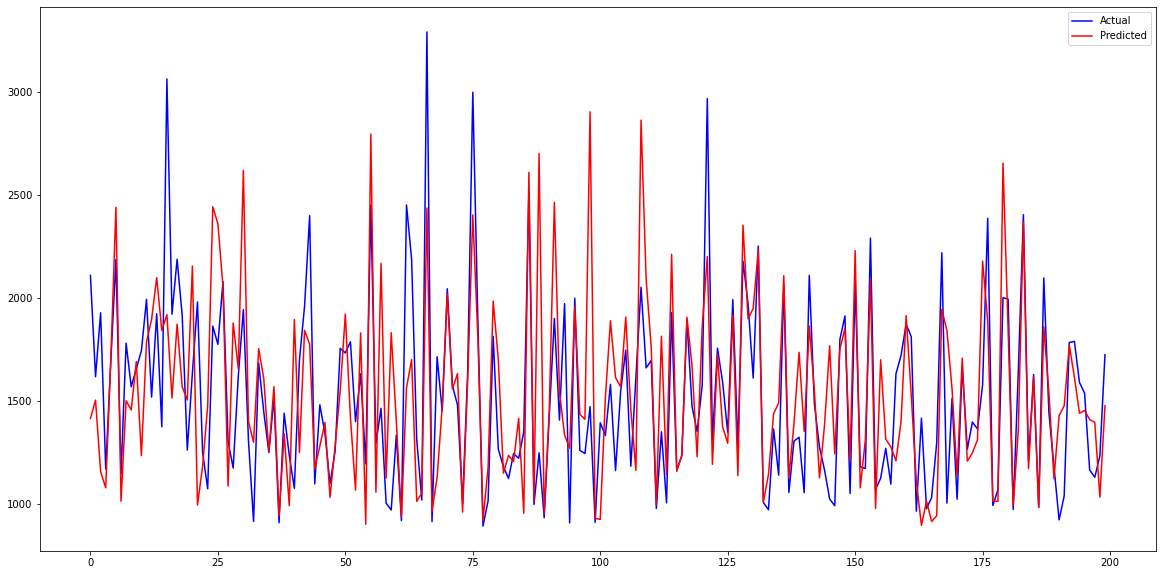

In [9]:
# Train decision tree model
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict the flowrate for the test set
y_pred = model.predict(X_test)

# Get the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % mse)

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred[:200], color='red', label='Predicted')
plt.legend()
plt.show()